**Nama : Jessica Athalia Rieuwpassa**

**Program : Introduction to Python for Data Science**

**Kode Peserta : PYTN-KS01-005**

# Assignment Python 3

# Import Library and Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max.columns", None) # untuk menampilkan semua kolom pada dataset

In [3]:
import xlrd

df = pd.read_excel('bank-full.xlsx')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df = df.rename(columns={'y': 'deposit'}) 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Preprocessing Dataset

## Cek Kesesuaian Tipe Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#konversi tipe data categorical
categorical = ["job","marital","education", "default", "housing", "loan", "contact", "poutcome","deposit"]

for col in categorical: 
    df[col] = df[col].astype("category")

In [9]:
#cek kembali tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  object  
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  deposit    45211 non-null  category
dtypes: category(9), int64(7), object(1)
memory usage: 3.1+ MB


## Identifikasi Kolom dengan Nilai Tunggal

In [10]:
# melihat unique values dari setiap kolom
counts = df.nunique()
counts

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

## Identify Duplicate Data

In [11]:
# cek apakah ada duplikasi data pada dataset

df.duplicated().any()

False

In [12]:
# melihat jumlah duplikasi data yang ada dalam dataset

df.duplicated().sum()

0

## Cek Missing Values

In [13]:
# cek missing values berupa nilai NA pada dataset
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
from numpy import nan

df = df.replace(' ', nan)

In [15]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Visualization

<AxesSubplot:xlabel='marital', ylabel='count'>

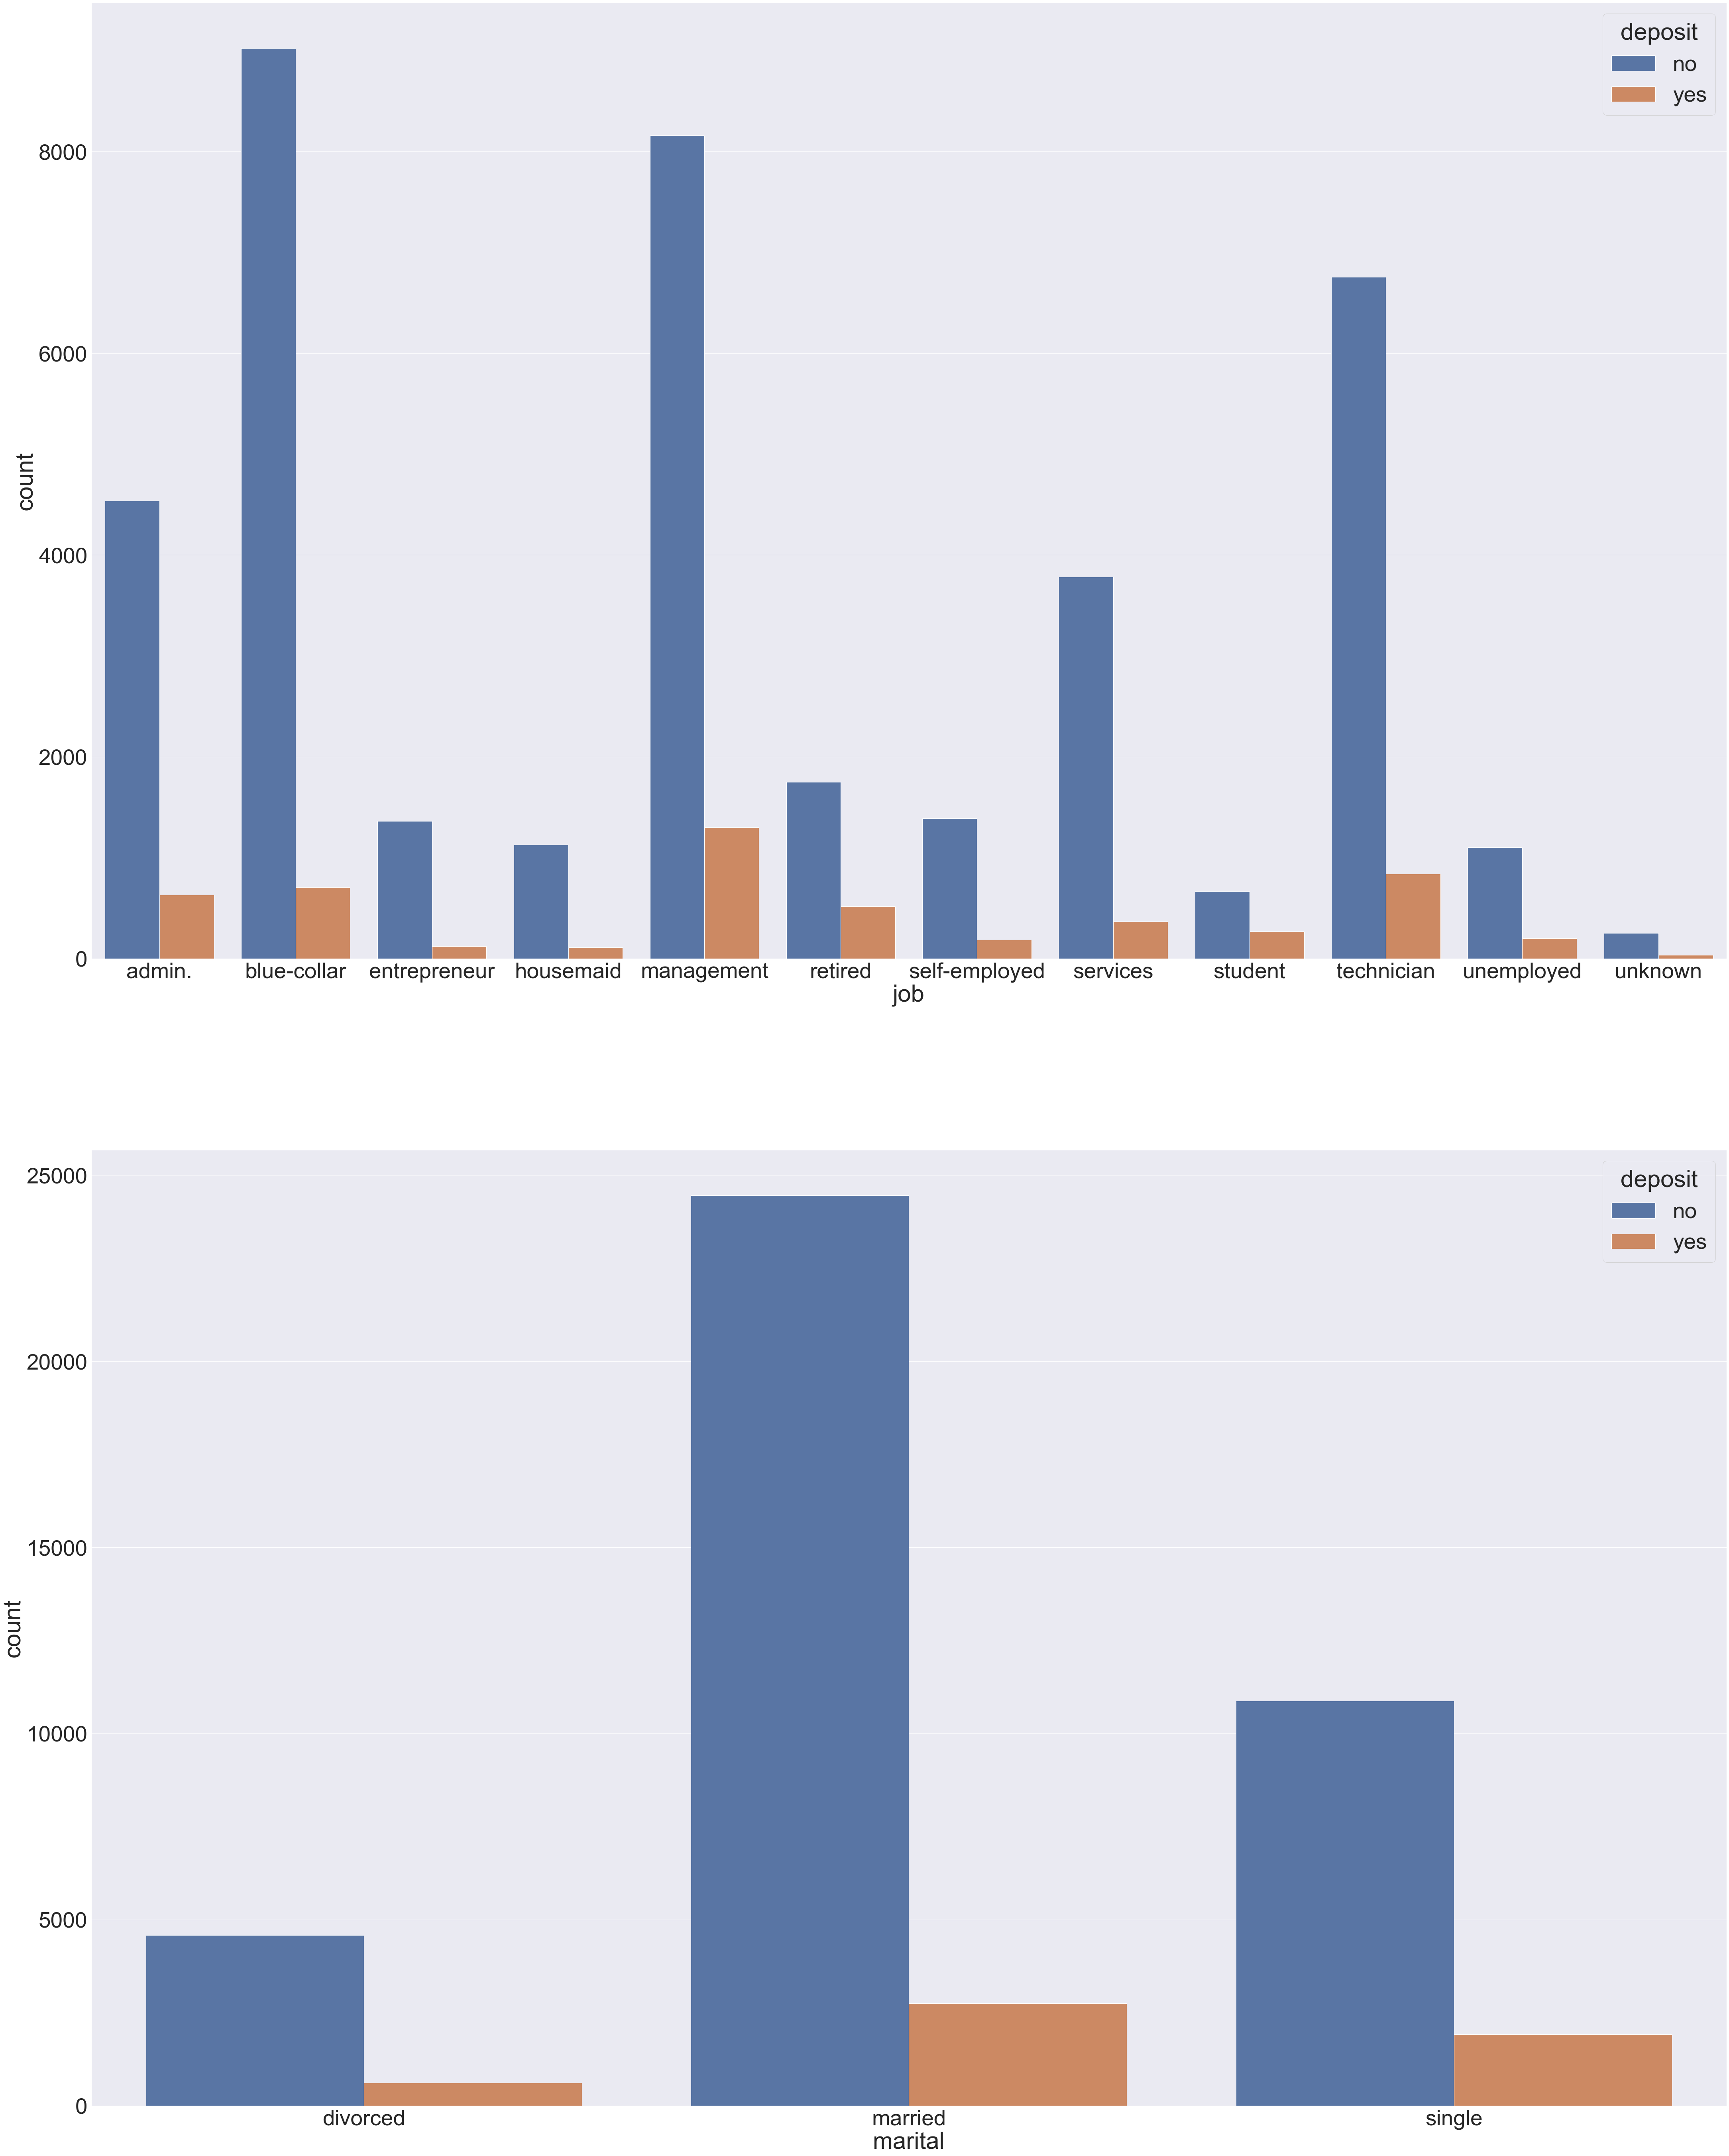

In [16]:
plt.figure(figsize = (250, 150))
sns.set(font_scale = 5)

plt.subplot(331)
sns.countplot(df['job'],hue=df['deposit'])

plt.subplot(334)
sns.countplot(df['marital'],hue=df['deposit'])

<AxesSubplot:xlabel='contact', ylabel='count'>

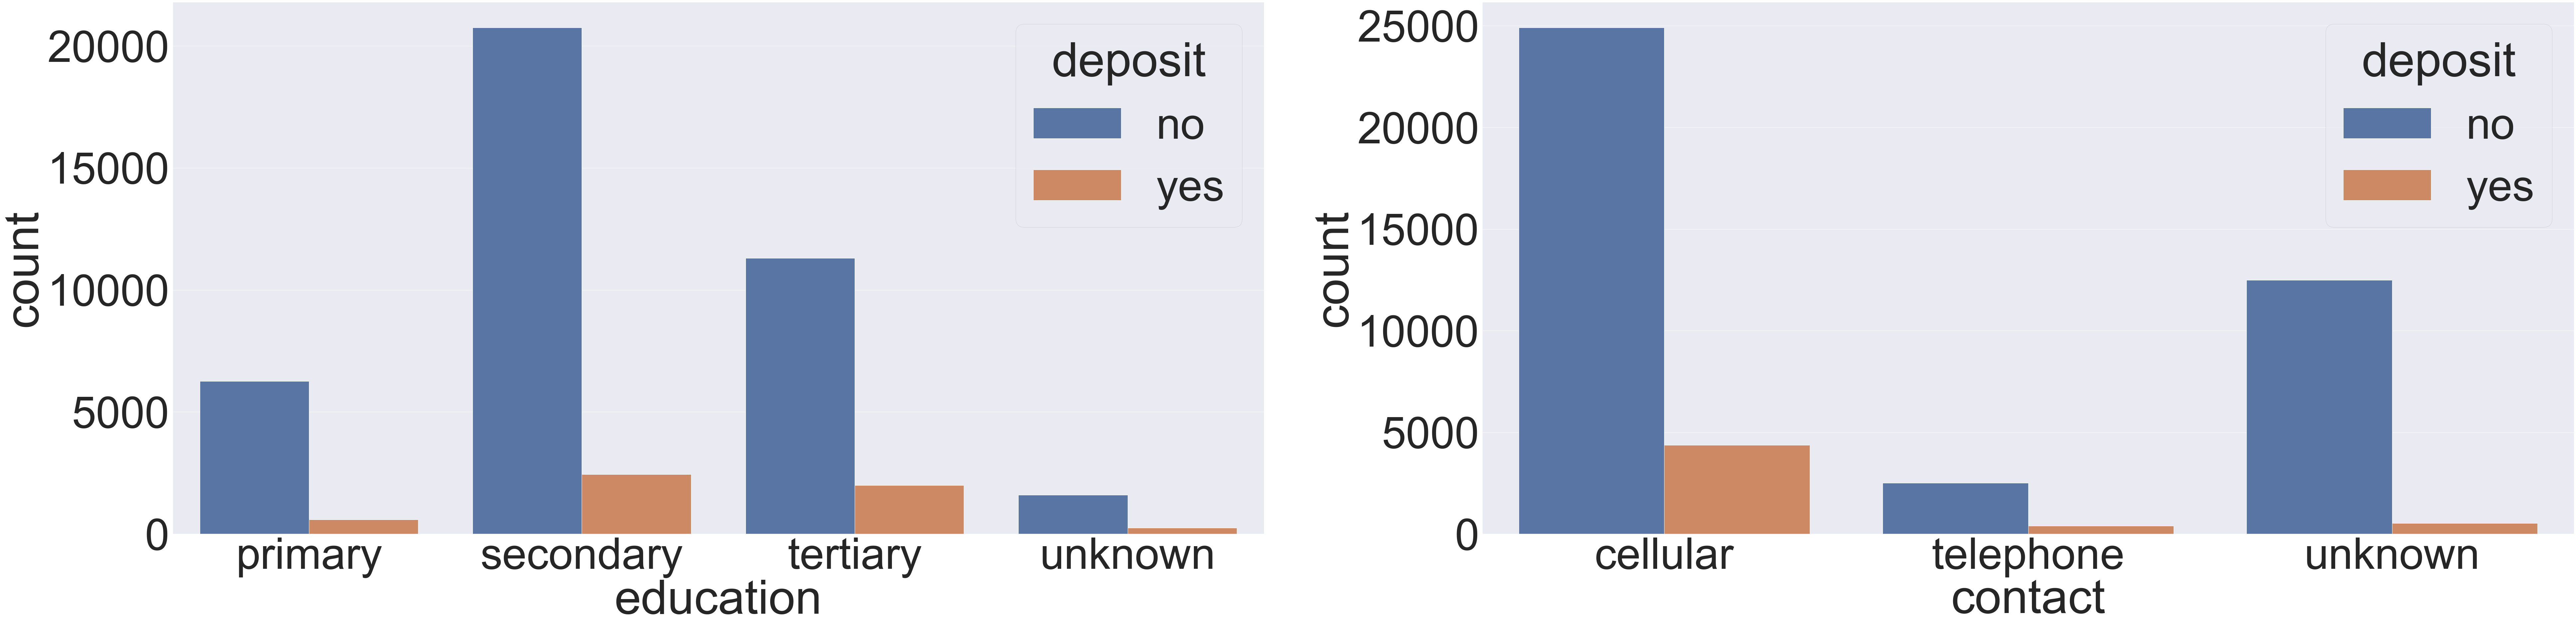

In [17]:
plt.figure(figsize = (200, 100))
sns.set(font_scale = 12)

plt.subplot(331)
sns.countplot(df['education'],hue=df['deposit'])

plt.subplot(332)
sns.countplot(df['contact'],hue=df['deposit'])

Dari visualisasi di atas dapat diambil informasi sebagai berikut :
1. Berdasarkan pekerjaan, client yang paling banyak memilih menggunakan deposito bekerja sebagai management dan yang paling sedikit tidak diketahui pekerjaannya (unknown)
2. Berdasarkan status, client yang paling banyak memilih menggunakan deposito adalah client dengan status married dan yang paling sedikit yaitu client dengan status divorce
3. Berdasarkan pendidikan, client yang paling banyak memilih menggunakan deposito adalah client dengan tingkat pendidikan secondary dan yang paling sedikit yaitu client dengan tingkat pendidikan tidak diketahui (unknown)
4. Berdasarkan contact, client yang paling banyak memilih menggunakan deposito adalah client dengan sarana komunikasi cellular dan yang paling sedikit yaitu client dengan sarana komunikasi telephone

## Distribusi Class

In [18]:
df_deposit = df['deposit'].value_counts()
df_deposit

no     39922
yes     5289
Name: deposit, dtype: int64

In [19]:
lables=df['deposit'].unique()
lables

['no', 'yes']
Categories (2, object): ['no', 'yes']

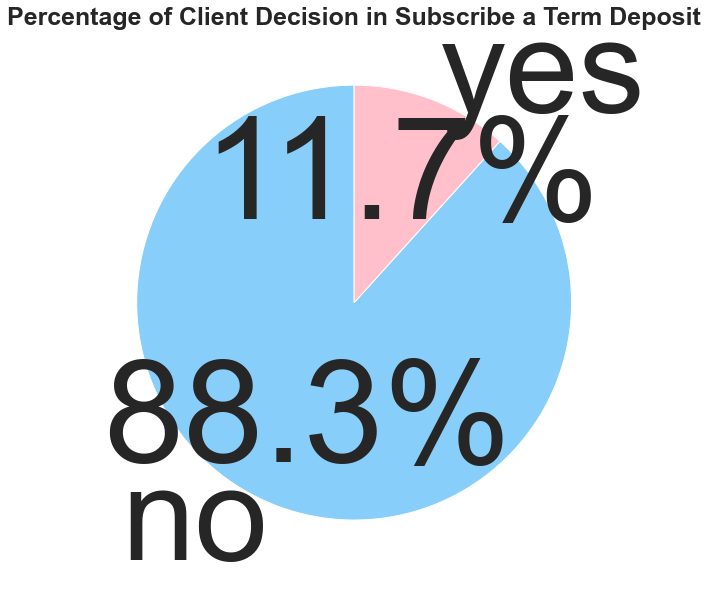

In [59]:
plt.figure(figsize=(20,10))
colors=['lightskyblue','pink']
font1 = {'weight': 'bold',
        'size': 25,
        }

ax = plt.axes()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font1)
ab=plt.pie(df_deposit, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%')
plt.show()

Berdasarkan pie chart di atas, dapat diketahui bahwa dari data bank tersebut sebanyak 88.3% memilih untuk tidak menggunakan deposito dan hanya 11.7% yang memilih menggunakan deposito.

## Scaller

In [21]:
from sklearn.preprocessing import StandardScaler

df_bank = df.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank[num_cols] = scaler.fit_transform(df_bank[num_cols])

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


## Encoder

In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
kol_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [23]:
# process encode categorical data 
df_encode = pd.DataFrame(encoder.fit_transform(df_bank[kol_cat]))
df_encode.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
#print(df_encode)
df_encode.columns = encoder.get_feature_names(kol_cat)
print(df_encode.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


In [25]:
df_bank = df_bank.drop(kol_cat ,axis=1)
df_bank.head()

,age,balance,day,duration,campaign,pdays,previous,deposit
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,no
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,no
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,no
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,no
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,no


In [26]:
df_bank_new = pd.concat([df_encode, df_bank], axis=1)
df_bank_new

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.251940,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.251940,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.251940,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.251940,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.251940,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.947747,-0.176460,0.143418,977,0.076230,-0.411453,-0.251940,yes
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.831227,0.120447,0.143418,456,-0.246560,-0.411453,-0.251940,yes
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.925401,1.429593,0.143418,1127,0.721811,1.436189,1.050473,yes
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.512791,-0.228024,0.143418,508,0.399020,-0.411453,-0.251940,no


In [27]:
# Encode target value
df_bank_new['deposit'] = df_bank_new['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print(df_bank_new.shape)
df_bank_new.head()

(45211, 52)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,0


## Memisahkan Feature dan Target

In [28]:
# select feataures
feature = df_bank_new.drop('deposit', axis=1)

In [29]:
# select target
target = df_bank_new['deposit']

## Split dataset

Split dataset menjadi data training dan data test dengan perbandingan 80 : 20

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (36168, 51)
Shape testing feature: (9043, 51)
Shape training label: (36168,)
Shape training label: (9043,)


# Membuat function evaluation model

In [31]:
# function evaluation model 
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Prediction Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Calculate precision, recall, f1-score, and kappa score
    precision = metrics.precision_score(y_test, y_pred)

    # Caclculate recall 
    recall = metrics.recall_score(y_test, y_pred)
    # calculate f1-score
    f1_score = metrics.f1_score(y_test, y_pred)
    # calculate kappa score 
    kappa_score = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]

    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    
    auc_score = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score, 'kappa_score': kappa_score, 
           'fpr': fpr, 'tpr': tpr, 'auc_score': auc_score, 'cm': cm}

# Classification

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [33]:
eval_lr = evaluate_model(model_lr, X_test, y_test)
print('Logistic Regression Accuracy:', eval_lr['accuracy'])

Logistic Regression Accuracy: 0.8988167643481145


In [34]:
# Display confussion matrix
print('Confusion Matrix:', eval_lr['cm'])

Confusion Matrix: [[7802  191]
 [ 724  326]]


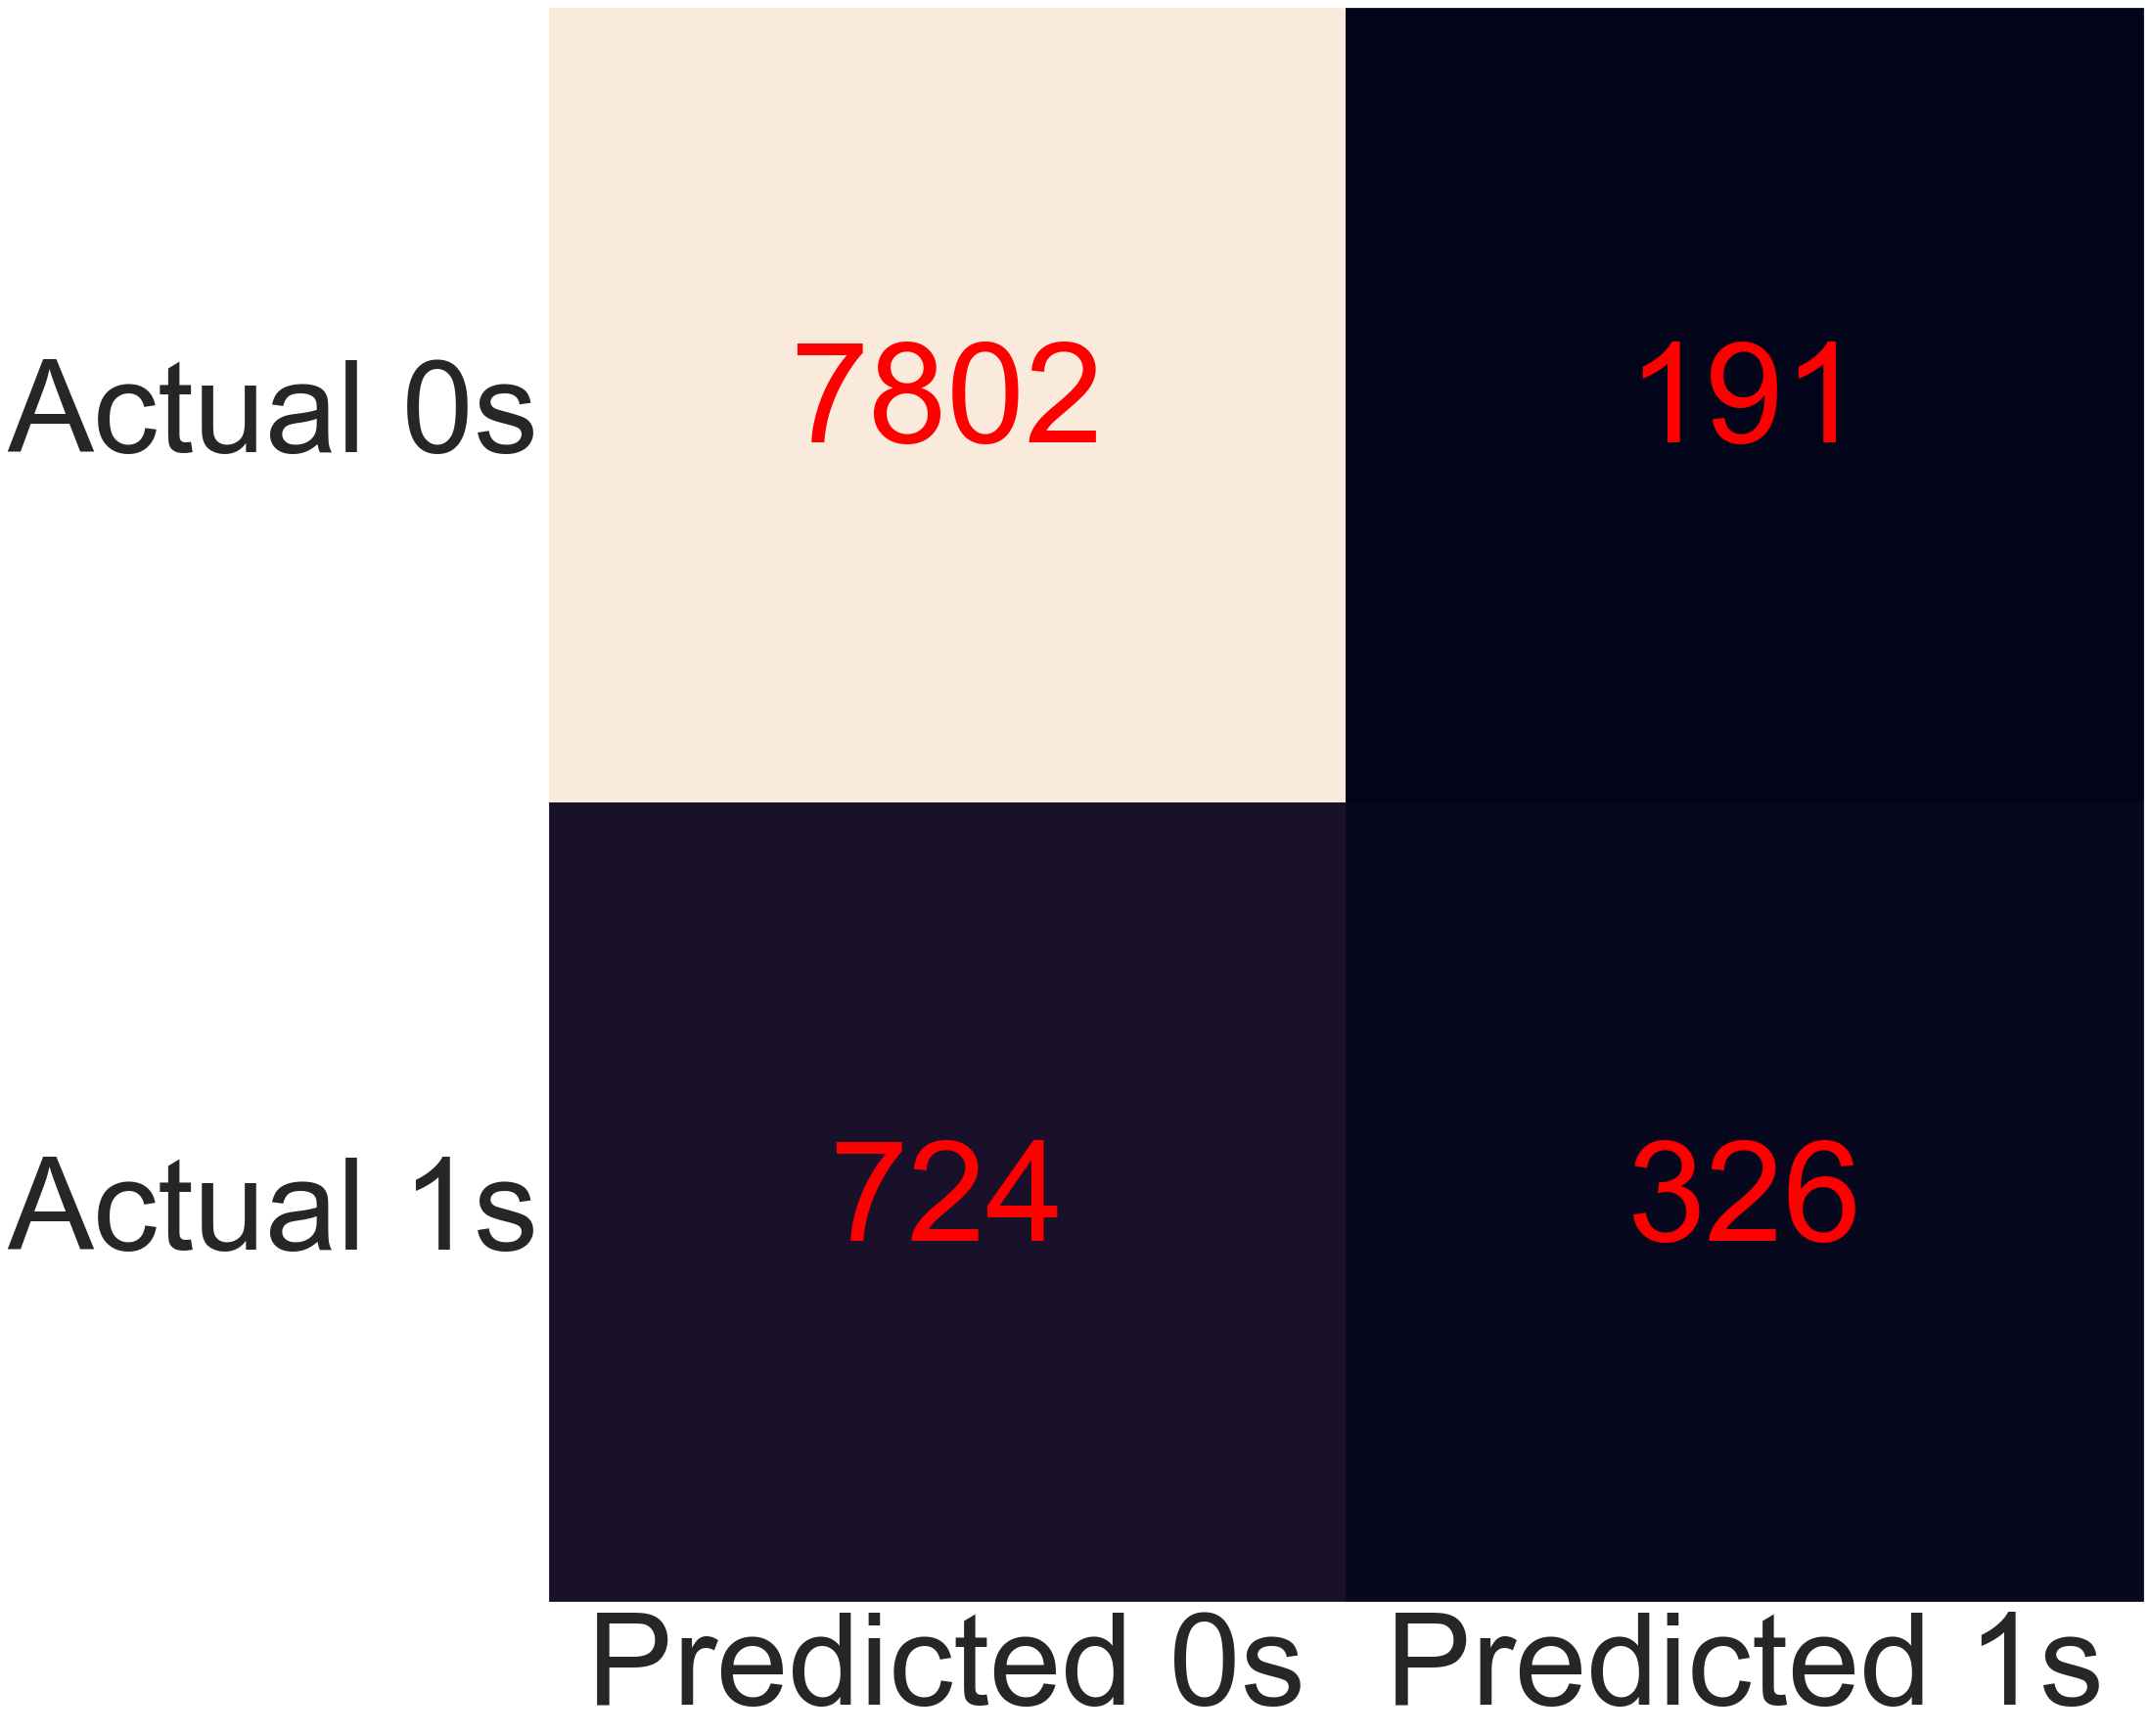

In [35]:
fig, ax = plt.subplots(figsize=(35, 30))
ax.imshow(eval_lr['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_lr['cm'][i, j], ha='center', va='center', color='red')
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:


- 7802 prediksi true negatif : 7802 data prediksi benar dinyatakan sebagai nol
- 724 prediksi false negatif: 724 data prediksi salah dinyatakan sebagai nol.
- 191 prediksi false positif: 191 data prediksi salah dinyatakan sebagai satu.
- 326 prediksi positif yang benar: 326 data prediksi benar dinyatakan sebagai satu.

## K-Nearest Neighbor (KNN)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
eval_knn = evaluate_model(model_knn, X_test, y_test)
print('KNN Accuracy:', eval_knn['accuracy'])

KNN Accuracy: 0.8894172287957536


In [38]:
# Display confussion matrix
print('Confusion Matrix:', eval_knn['cm'])

Confusion Matrix: [[7745  248]
 [ 752  298]]


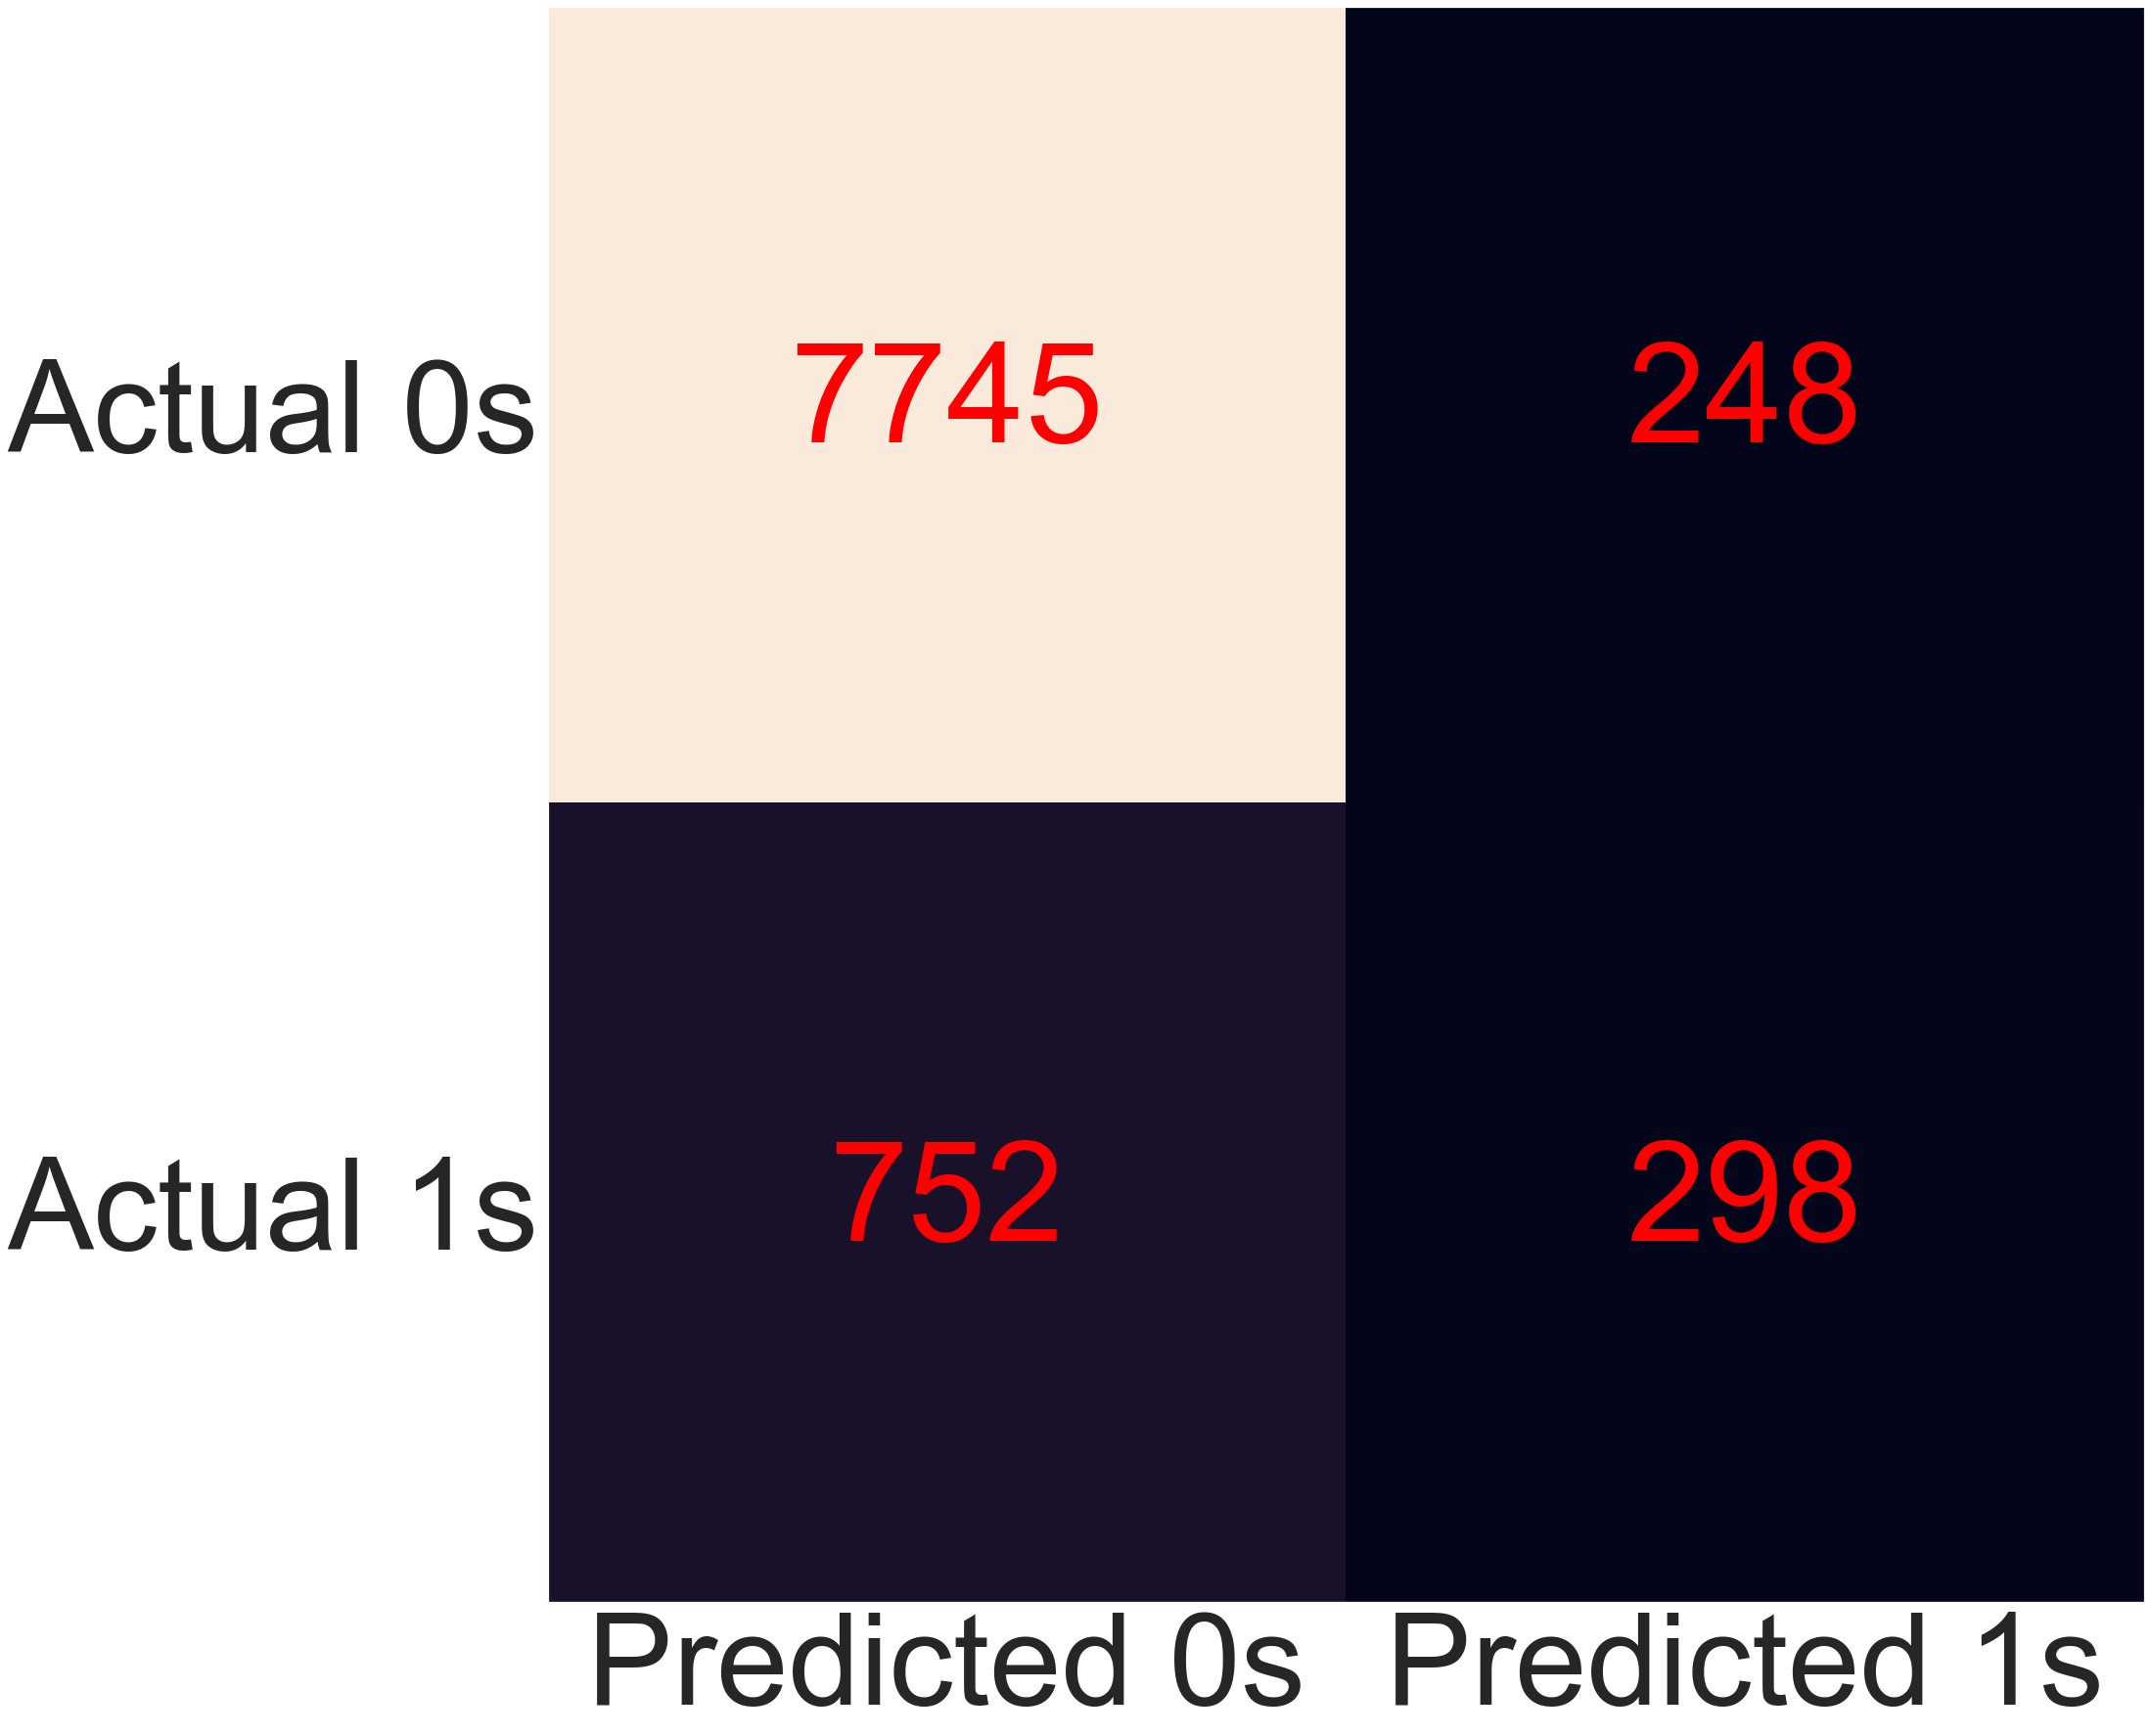

In [39]:
fig, ax = plt.subplots(figsize=(35, 30))
ax.imshow(eval_knn['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_knn['cm'][i, j], ha='center', va='center', color='red')
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:


- 7745 prediksi true negatif : 7745 data prediksi benar dinyatakan sebagai nol
- 752 prediksi false negatif: 752 data prediksi salah dinyatakan sebagai nol.
- 248 prediksi false positif: 248 data prediksi salah dinyatakan sebagai satu.
- 298 prediksi positif yang benar: 298 data prediksi benar dinyatakan sebagai satu.

# Support Vector Machine (SVM)

In [40]:
# Building SVM model 
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

In [41]:
y_pred = model_svm.predict(X_test)

In [42]:
from sklearn import metrics 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8893066460245493


In [43]:
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)

Confusion Matrix: [[7876  117]
 [ 884  166]]


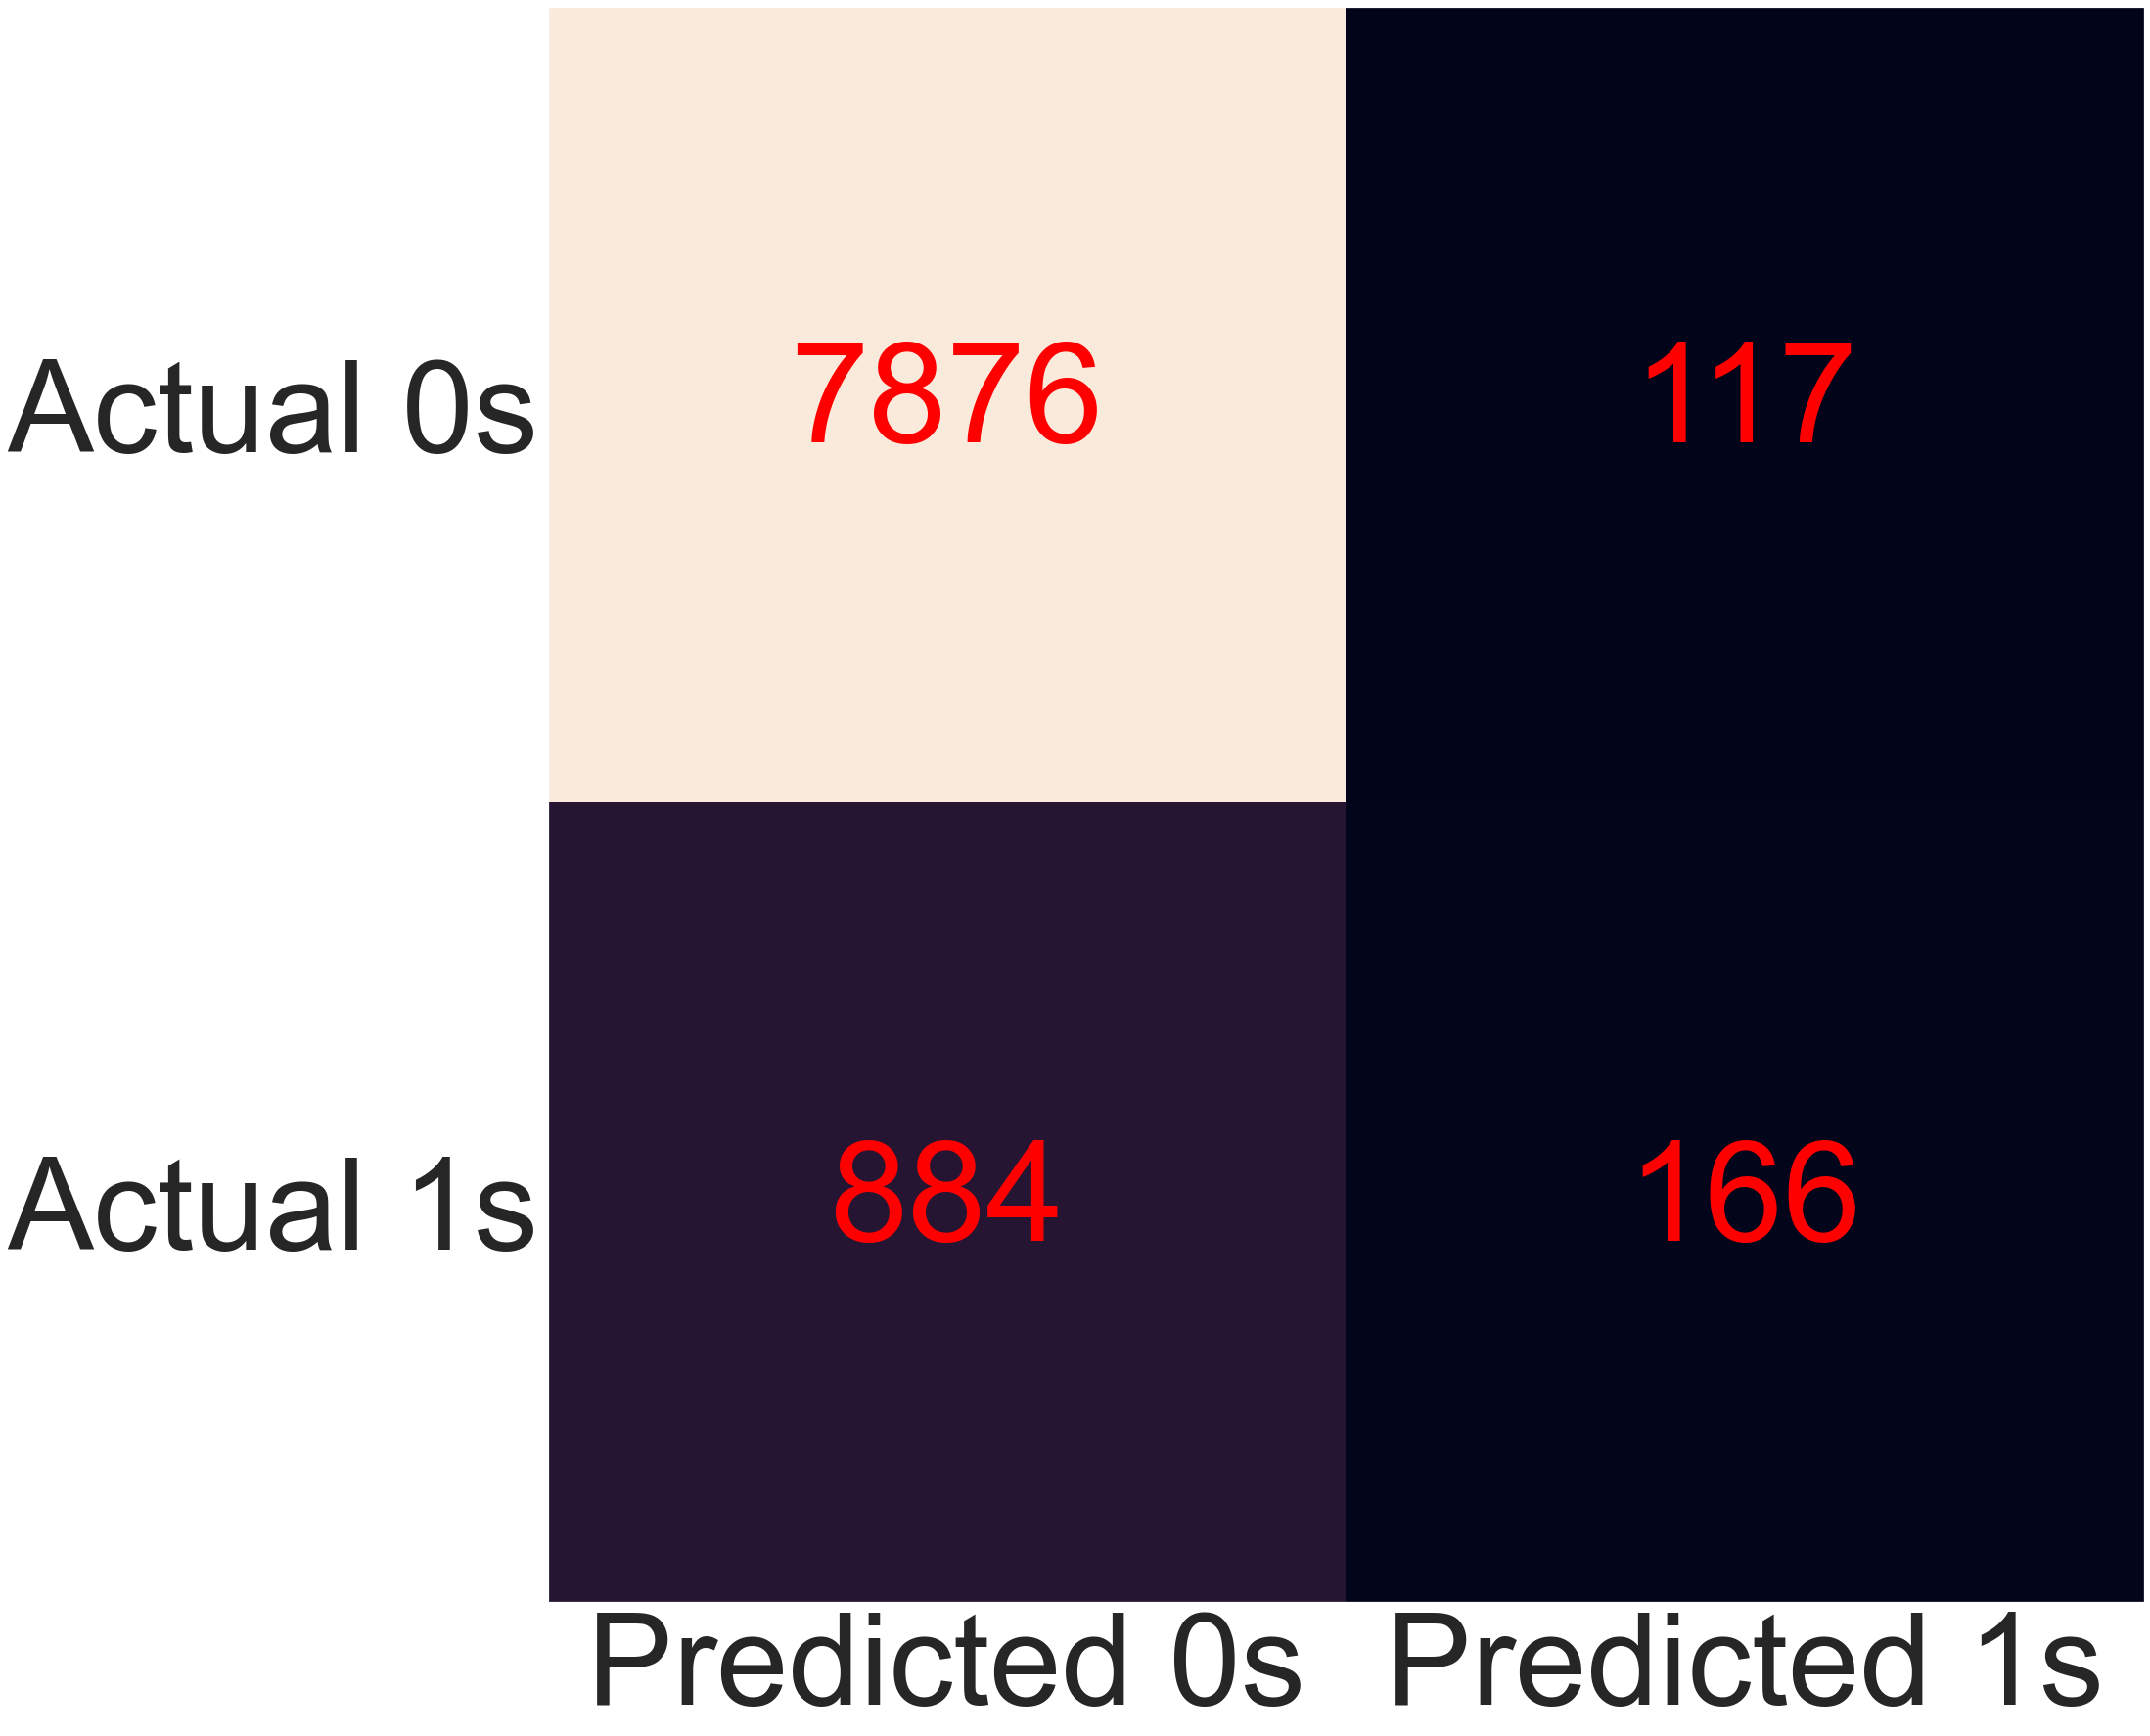

In [44]:
fig, ax = plt.subplots(figsize=(35, 30))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:


- 7876 prediksi true negatif : 7876 data prediksi benar dinyatakan sebagai nol
- 884 prediksi false negatif: 884 data prediksi salah dinyatakan sebagai nol.
- 117 prediksi false positif: 117 data prediksi salah dinyatakan sebagai satu.
- 166 prediksi positif yang benar: 166 data prediksi benar dinyatakan sebagai satu.

# Decision Tree

In [45]:
from sklearn import tree
model_dtree = tree.DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3)
model_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
eval_dtree = evaluate_model(model_dtree, X_test, y_test)
print('DecisionTree Accuracy:', eval_dtree['accuracy'])

DecisionTree Accuracy: 0.9005860886873825


In [47]:
# Display confussion matrix
print('Confusion Matrix:', eval_dtree['cm'])

Confusion Matrix: [[7784  209]
 [ 690  360]]


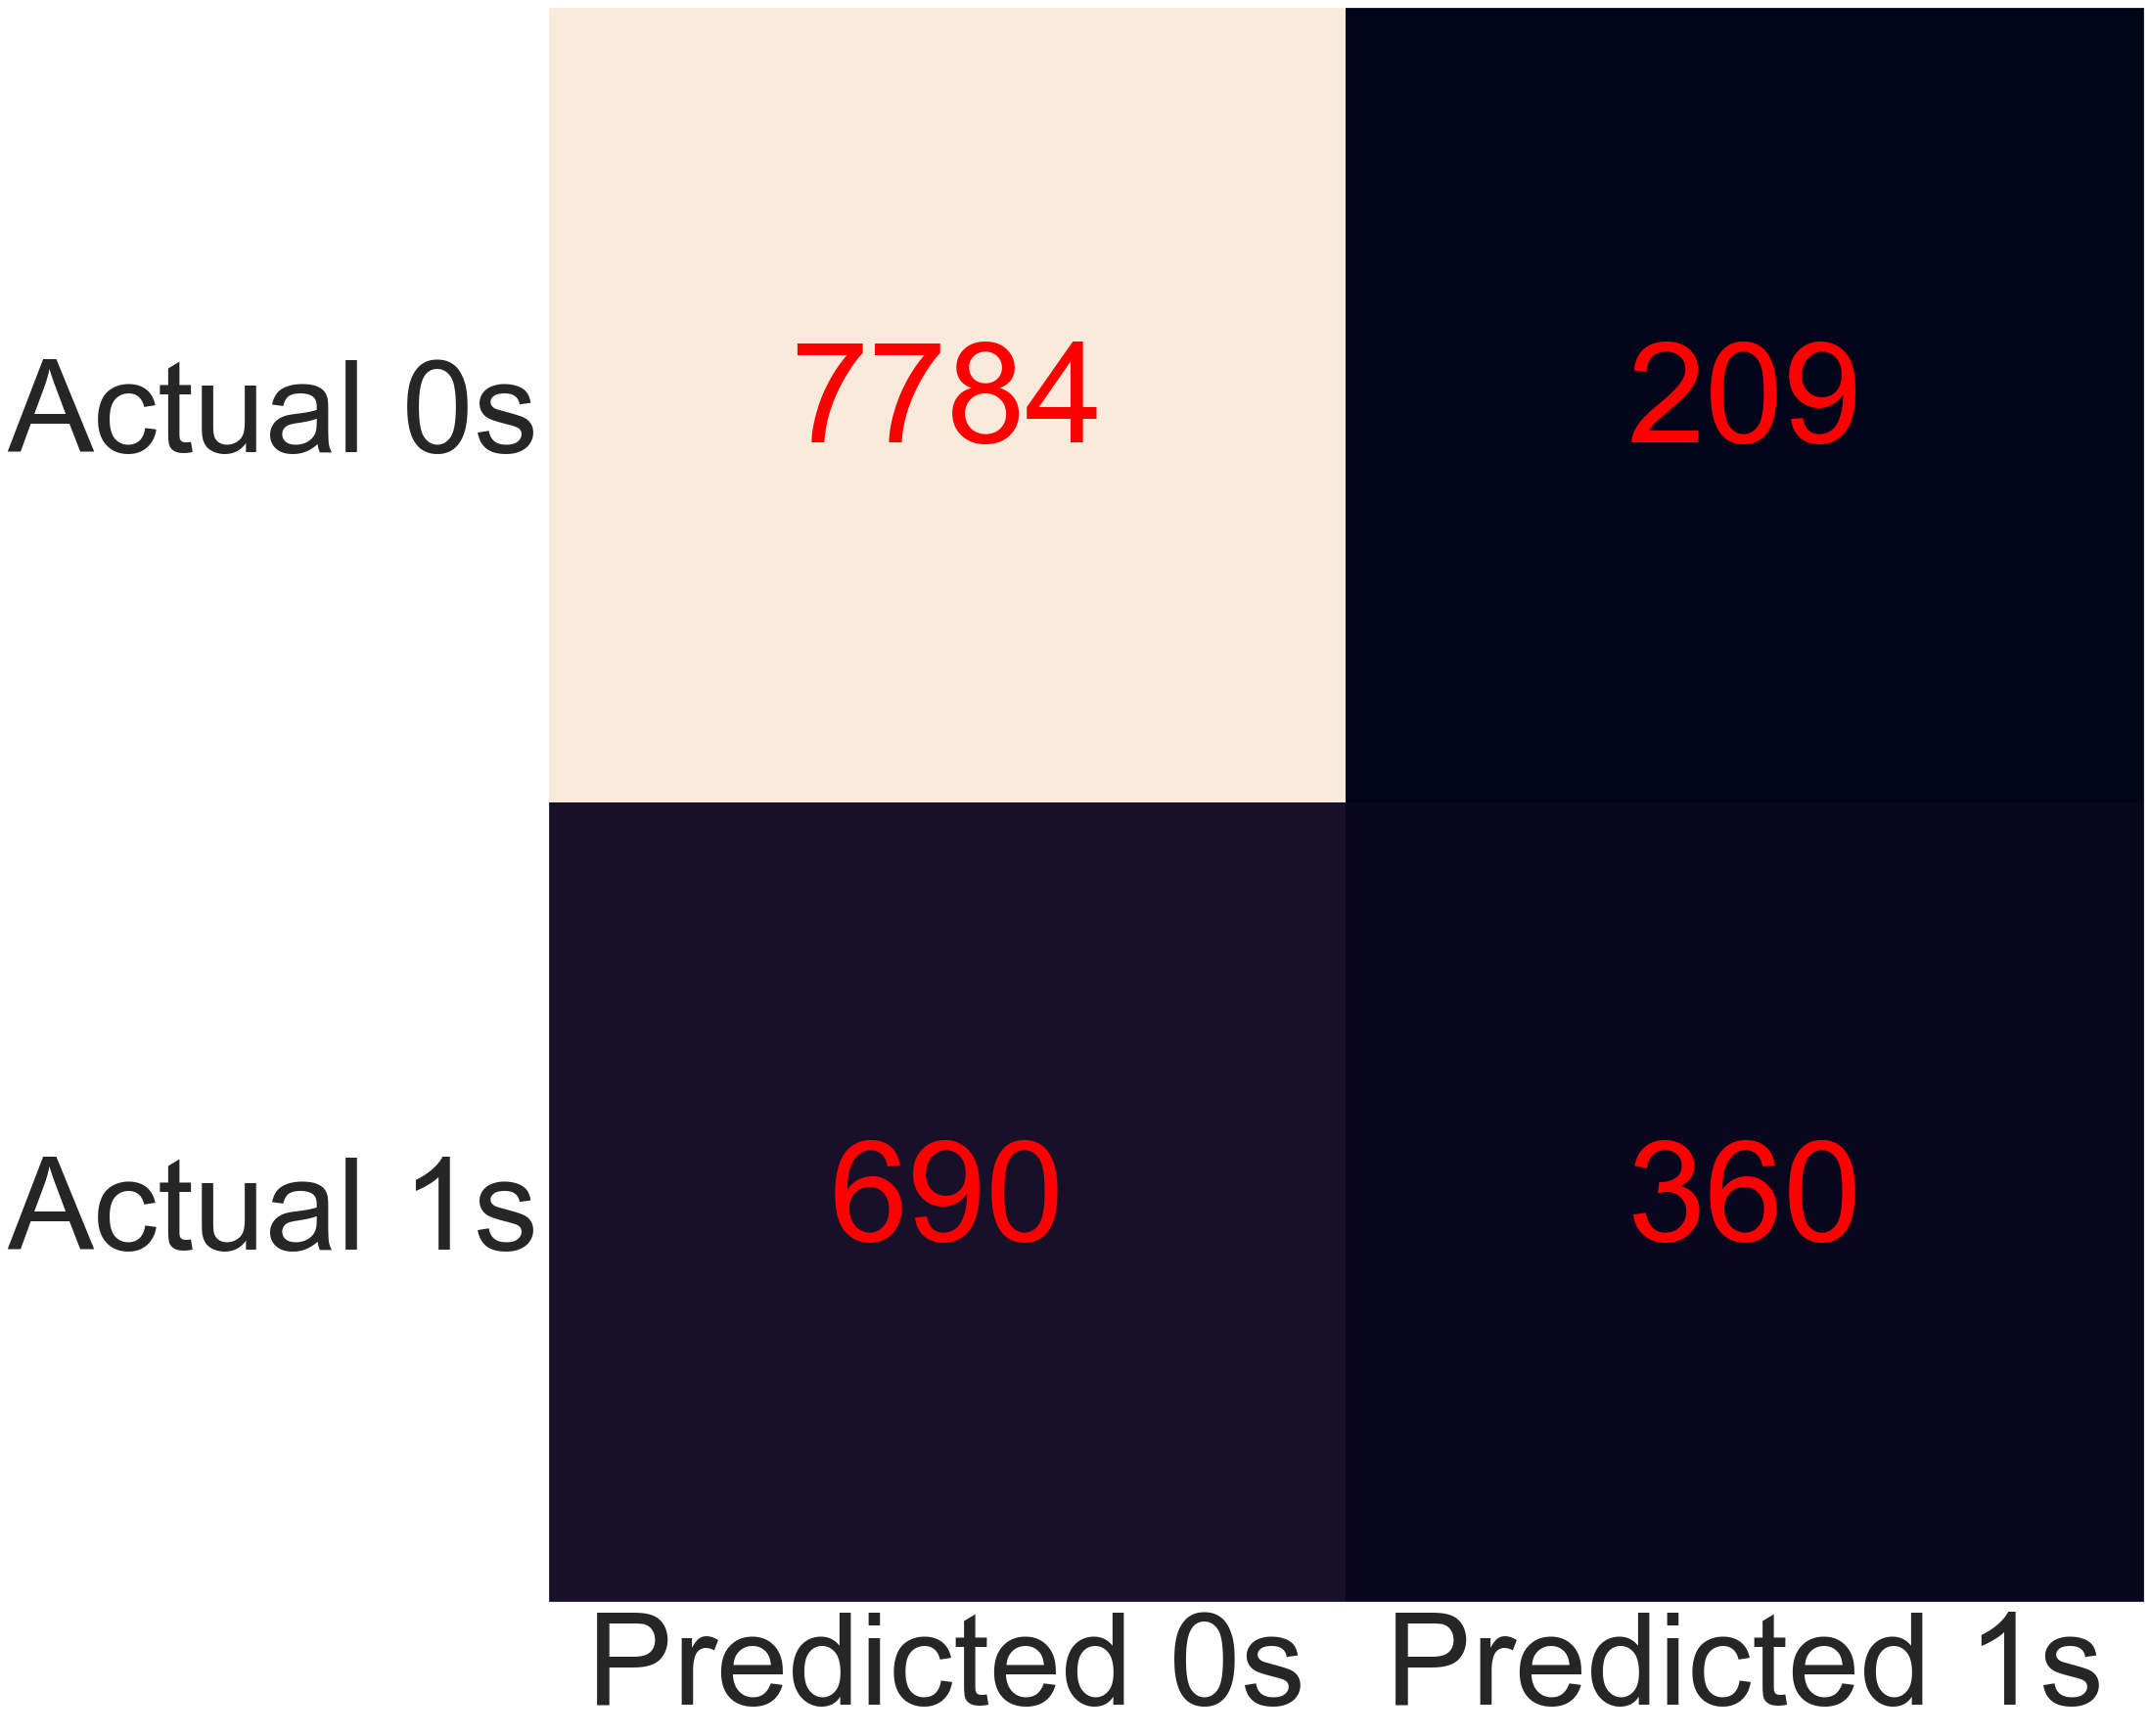

In [48]:
fig, ax = plt.subplots(figsize=(35, 30))
ax.imshow(eval_dtree['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_dtree['cm'][i, j], ha='center', va='center', color='red')
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:


- 7784 prediksi true negatif : 7784 data prediksi benar dinyatakan sebagai nol
- 690 prediksi false negatif: 690 data prediksi salah dinyatakan sebagai nol.
- 209 prediksi false positif: 209 data prediksi salah dinyatakan sebagai satu.
- 360 prediksi positif yang benar: 360 data prediksi benar dinyatakan sebagai satu.

# Random Forest

In [49]:
# Building Random Forest model 
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
eval_rf = evaluate_model(model_rf, X_test, y_test)
print('RandomForest Accuracy:', eval_rf['accuracy'])

RandomForest Accuracy: 0.907110472188433


In [51]:
# Display confussion matrix
print('Confusion Matrix:', eval_rf['cm'])

Confusion Matrix: [[7759  234]
 [ 606  444]]


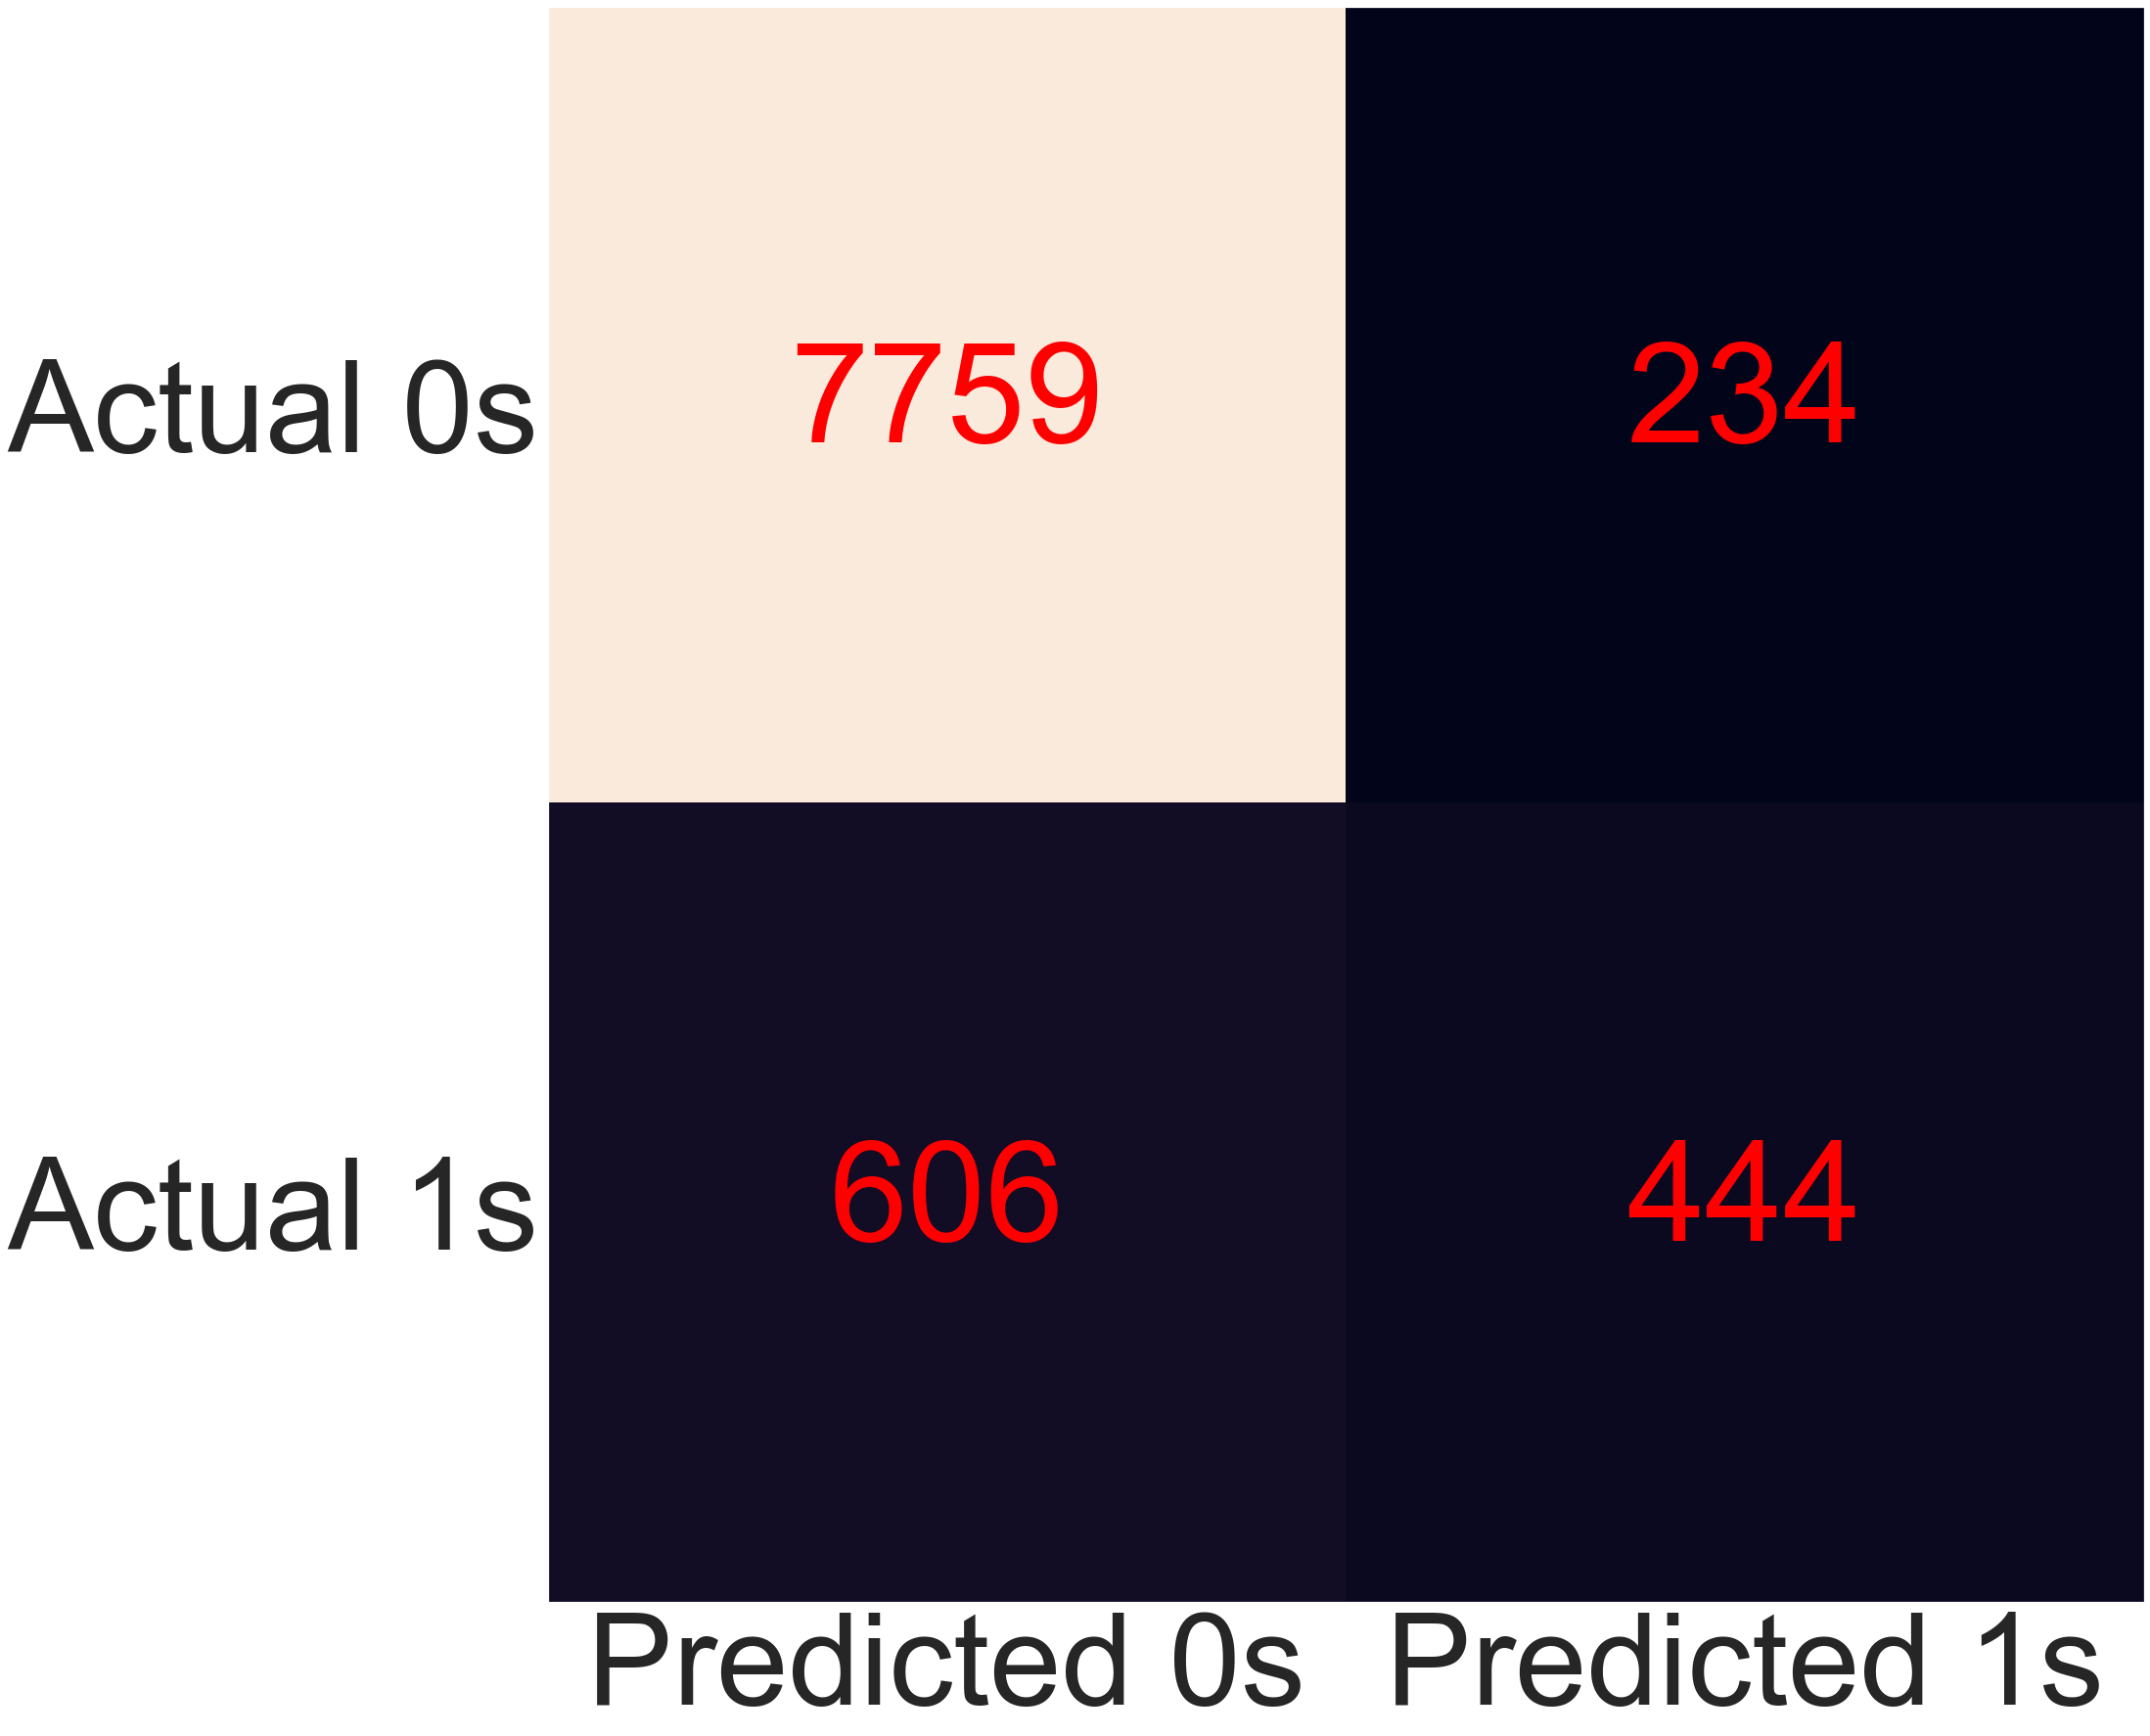

In [52]:
fig, ax = plt.subplots(figsize=(35, 30))
ax.imshow(eval_rf['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_rf['cm'][i, j], ha='center', va='center', color='red')
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:


- 7759 prediksi true negatif : 7759 data prediksi benar dinyatakan sebagai nol
- 606 prediksi false negatif: 606 data prediksi salah dinyatakan sebagai nol.
- 234 prediksi false positif: 234 data prediksi salah dinyatakan sebagai satu.
- 444 prediksi positif yang benar: 444 data prediksi benar dinyatakan sebagai satu.

# Naive Bayes

In [53]:
# Building Naive Bayes model 
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [54]:
eval_nb = evaluate_model(model_nb, X_test, y_test)
print('Naive Bayes Accuracy:', eval_nb['accuracy'])

Naive Bayes Accuracy: 0.8514873382726971


In [55]:
# Display confussion matrix
print('Confusion Matrix:', eval_nb['cm'])

Confusion Matrix: [[7152  841]
 [ 502  548]]


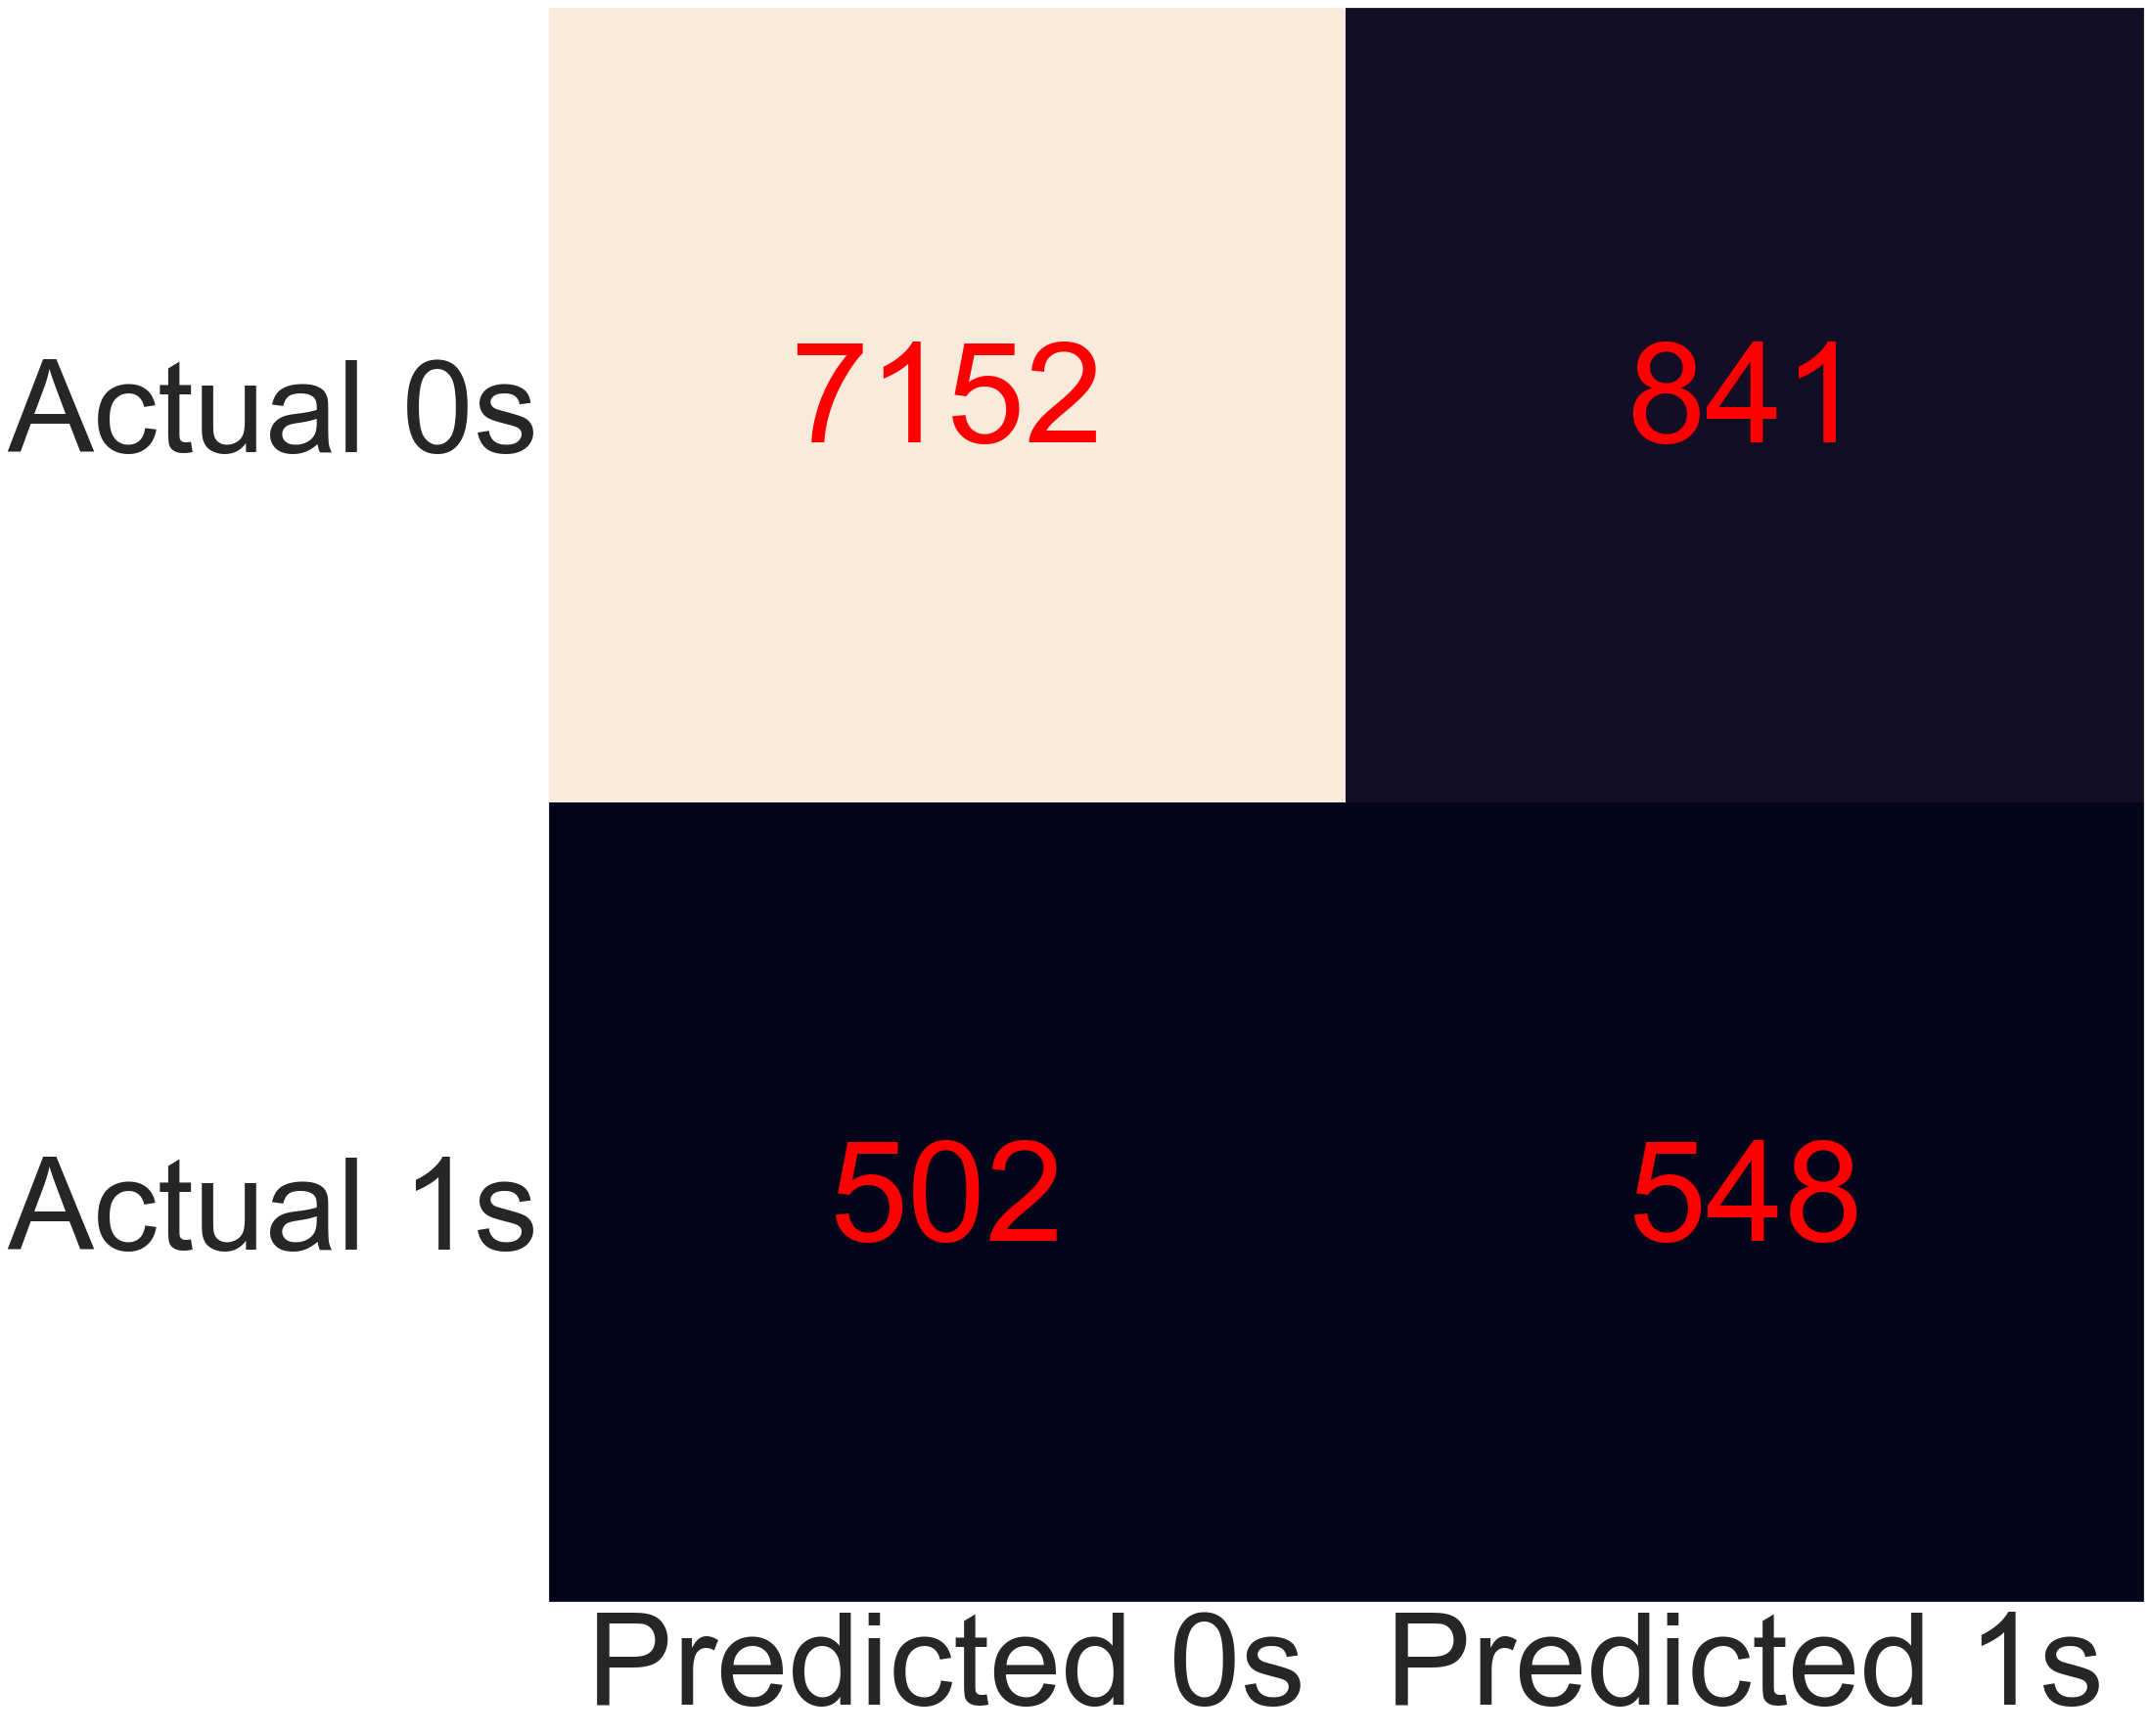

In [56]:
fig, ax = plt.subplots(figsize=(35, 30))
ax.imshow(eval_nb['cm'])
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, eval_nb['cm'][i, j], ha='center', va='center', color='red')
plt.show()

Matriks yang diperoleh menunjukkan hasil sebagai berikut:


- 7152 prediksi true negatif : 7152 data prediksi benar dinyatakan sebagai nol
- 502 prediksi false negatif: 502 data prediksi salah dinyatakan sebagai nol.
- 841 prediksi false positif: 841 data prediksi salah dinyatakan sebagai satu.
- 548 prediksi positif yang benar: 548 data prediksi benar dinyatakan sebagai satu.

# Kesimpulan

Berdasarkan classification data bank menggunakan berbagai algoritma dapat dibandingkan berdasarkan accuracy yaitu sebagai berikut :

|Algorithm            | Accuracy           |
|---------------------|--------------------|
| Logistic Regression | 0.8988167643481145 |
| KNN                 | 0.8894172287957536 |
| SVM                 | 0.8893066460245493 |
| Decision Tree       | 0.9005860886873825 |
| Random Forest       | 0.907110472188433  |
| Naive Bayes         | 0.8514873382726971 |

Untuk memprediksi apakah client akan subscribe (yes/no) sebuah deposito dari data bank tersebut, algoritma yang paling sesuai untuk digunakan yaitu **Random Forest**. 

Dapat dilihat pada tabel bahwa Random Forest memiliki nilai accuracy tertinggi yaitu **0.907110472188433 atau 90,71%**.